## Exploratory Data Analytics 

### Descriptive Statistics 

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv('C:\\Users\\garre\\.venv2\\Garrett_Kopp_Capstone_Project\\Capstone-Project\\Buoydata_modified.csv')

wave_stats = df['wave_height_m'].describe()
wind_speed_stats = df['wind_speed_kn'].describe()
gust_stats = df['gust_kn'].describe()

print("Wave Height Statistics:")
print(wave_stats)

print("\nWind Speed Statistics:")
print(wind_speed_stats)

print("\nGust Statistics:")
print(gust_stats)


Wave Height Statistics:
count    98080.000000
mean         1.997805
std          1.391849
min          0.117000
25%          1.016000
50%          1.680000
75%          2.617000
max         13.828000
Name: wave_height_m, dtype: float64

Wind Speed Statistics:
count    98080.000000
mean        14.618114
std          6.639388
min          0.000000
25%          9.962000
50%         14.373000
75%         18.785000
max         76.506000
Name: wind_speed_kn, dtype: float64

Gust Statistics:
count    98080.000000
mean        19.609662
std          9.213233
min          0.000000
25%         13.092000
50%         18.671000
75%         24.904000
max        116.125000
Name: gust_kn, dtype: float64


### Data Visualization

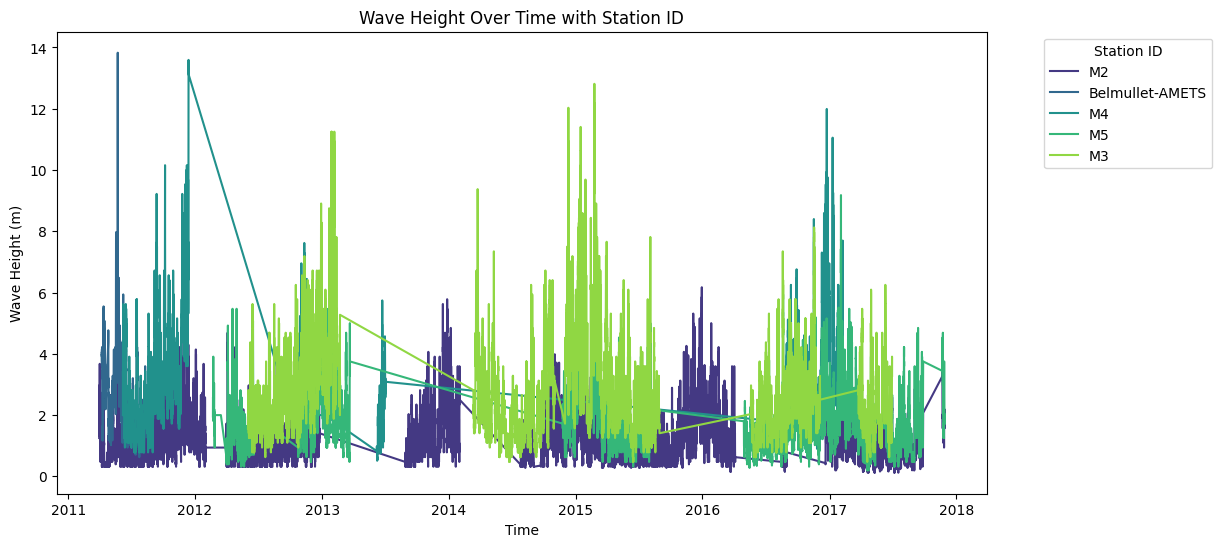

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'time_UTC' is a datetime column
df['time_UTC'] = pd.to_datetime(df['time_UTC'])

# Time series plot for wave height with color coding for station_id
plt.figure(figsize=(12, 6))
sns.lineplot(x='time_UTC', y='wave_height_m', hue='station_id', data=df, palette='viridis')
plt.title('Wave Height Over Time with Station ID')
plt.xlabel('Time')
plt.ylabel('Wave Height (m)')
plt.legend(title='Station ID', loc='upper right', bbox_to_anchor=(1.25, 1))
plt.show()





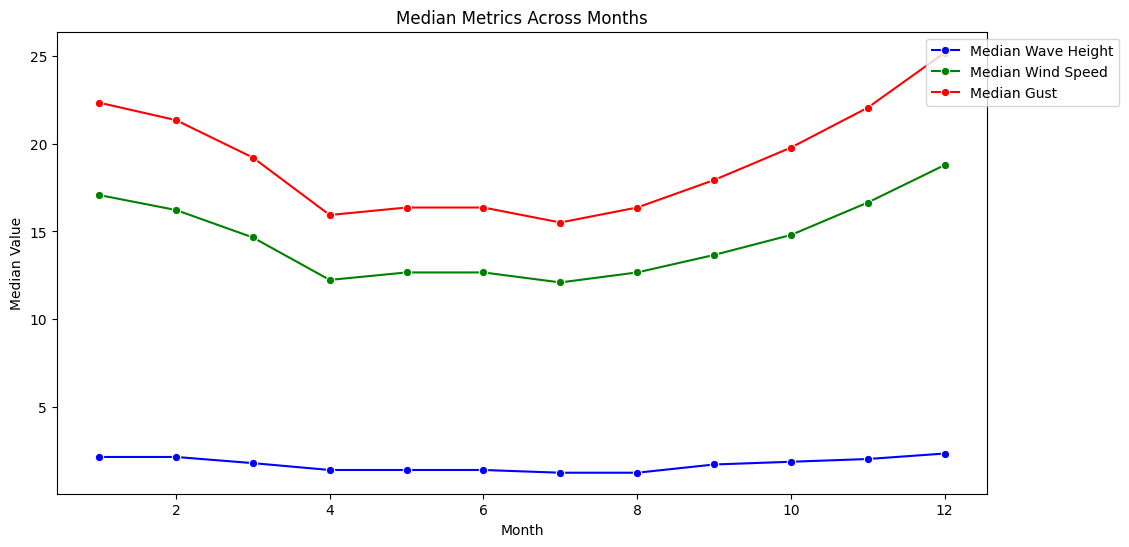

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'time_UTC' is a datetime column
df['time_UTC'] = pd.to_datetime(df['time_UTC'])

# Extract month numbers and add them as a new column
df['month'] = df['time_UTC'].dt.month

# Set up the figure and axis
plt.figure(figsize=(12, 6))

# Calculate the median for each metric across months
median_wave_heights = df.groupby('month')['wave_height_m'].median()
median_wind_speeds = df.groupby('month')['wind_speed_kn'].median()
median_gusts = df.groupby('month')['gust_kn'].median()

# Create line plots for each metric
sns.lineplot(x=median_wave_heights.index, y=median_wave_heights.values, marker='o', color='b', label='Median Wave Height')
sns.lineplot(x=median_wind_speeds.index, y=median_wind_speeds.values, marker='o', color='g', label='Median Wind Speed')
sns.lineplot(x=median_gusts.index, y=median_gusts.values, marker='o', color='r', label='Median Gust')

# Customize the plot
plt.title('Median Metrics Across Months')
plt.xlabel('Month')
plt.ylabel('Median Value')
plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1))

# Show the plot
plt.show()








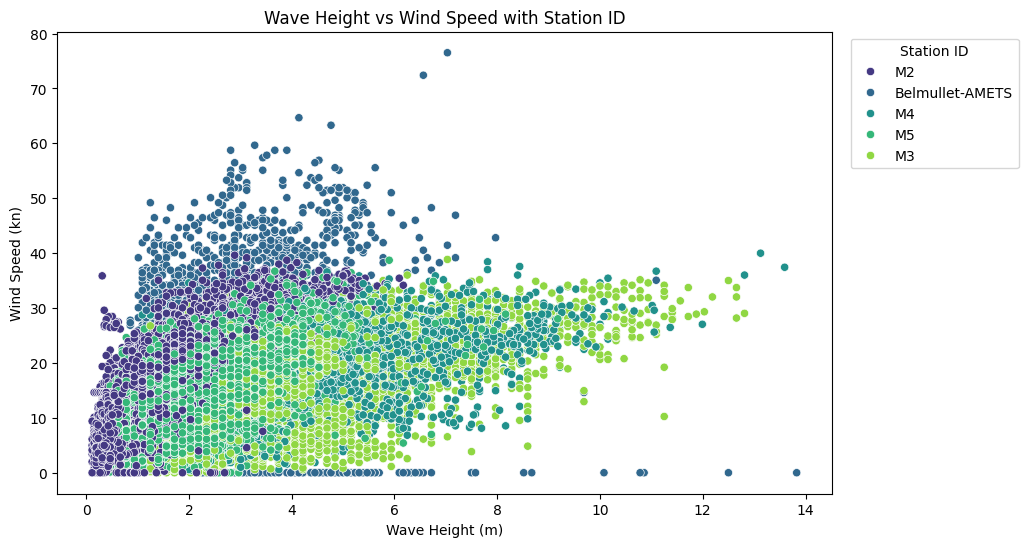

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'time_UTC' is a datetime column
df['time_UTC'] = pd.to_datetime(df['time_UTC'])

# Scatter plot for wave height vs wind speed with color coding for station_id
plt.figure(figsize=(10, 6))
sns.scatterplot(x='wave_height_m', y='wind_speed_kn', hue='station_id', data=df, palette='viridis')
plt.title('Wave Height vs Wind Speed with Station ID')
plt.xlabel('Wave Height (m)')
plt.ylabel('Wind Speed (kn)')
plt.legend(title='Station ID', loc='upper right', bbox_to_anchor=(1.25, 1))
plt.show()


### ### Correlation analysis

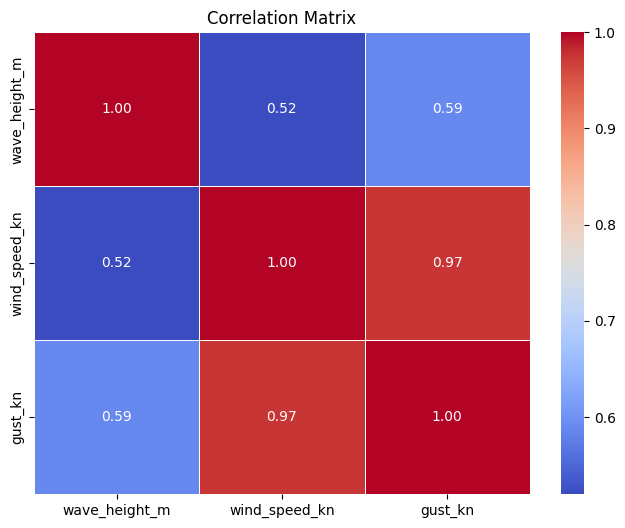

In [8]:
correlation_matrix = df[['wave_height_m', 'wind_speed_kn', 'gust_kn']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix')
plt.show()


### Broader Coorelation Matrix

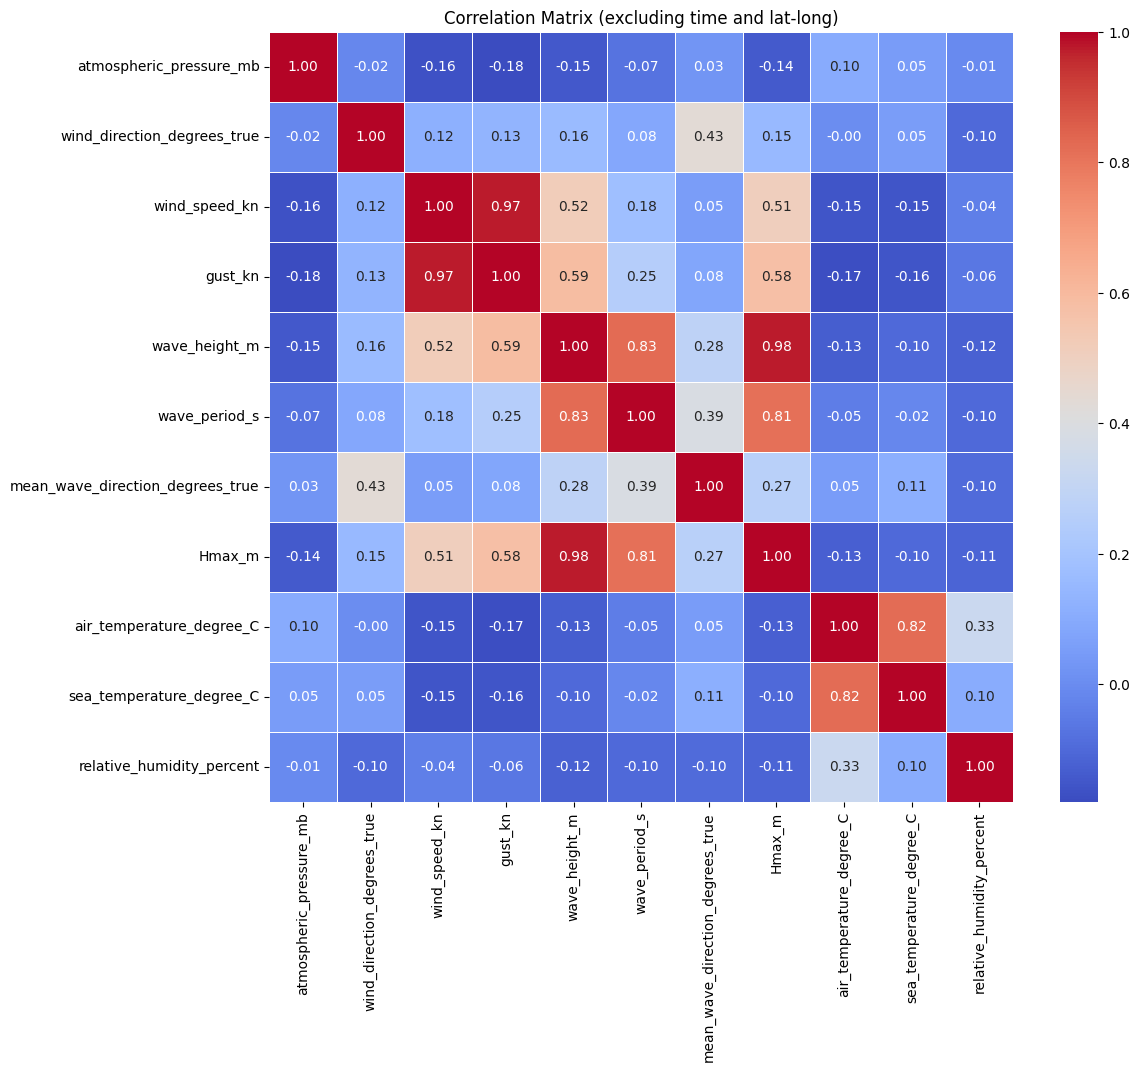

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'time_UTC' is a datetime column
df['time_UTC'] = pd.to_datetime(df['time_UTC'])

# Select relevant columns for correlation analysis (excluding time and lat-long)
selected_columns = [
    'atmospheric_pressure_mb', 'wind_direction_degrees_true', 'wind_speed_kn', 'gust_kn',
    'wave_height_m', 'wave_period_s', 'mean_wave_direction_degrees_true', 'Hmax_m',
    'air_temperature_degree_C', 'sea_temperature_degree_C', 'relative_humidity_percent'
]

correlation_matrix = df[selected_columns].corr()

# Plot the correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix (excluding time and lat-long)')
plt.show()


### Pair Plot on Critical Variables

C:\Users\garre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


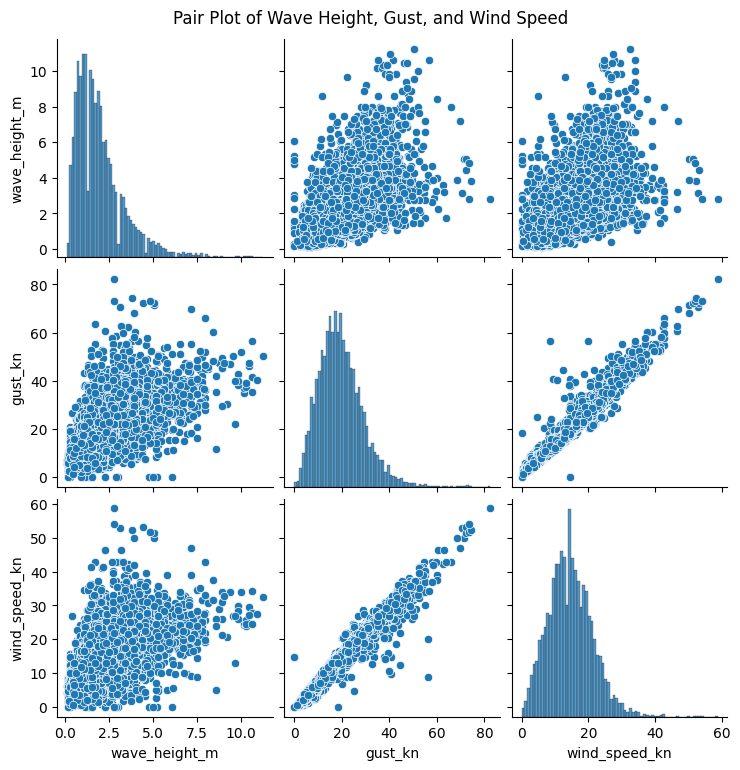

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'time_UTC' is a datetime column
df['time_UTC'] = pd.to_datetime(df['time_UTC'])

# Select specific columns for the pair plot
selected_columns = ['wave_height_m', 'gust_kn', 'wind_speed_kn']

# Subsample the data to avoid long computation times for large datasets
# Adjust the fraction parameter based on the size of your dataset
df_subsampled = df.sample(frac=0.1)

# Create a pair plot
sns.pairplot(df_subsampled[selected_columns])
plt.suptitle('Pair Plot of Wave Height, Gust, and Wind Speed', y=1.02)
plt.show()